In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
class BernoulliBandit:
    def __init__(self, p):
        self.p = p
        
    def display_ad(self):
        reward = np.random.binomial(1, self.p)
        return reward

In [37]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

# In the section below, we use the A/B/N testing for solving exploration-exploitation trade-off

In [38]:
n_ads = len(ads)

Q = np.zeros(n_ads)
N = np.zeros(n_ads)

total_reward = 0
avg_rewards = []

### Training

In [39]:
for i in range(10000):
    ad_chosen = np.random.randint(n_ads)
    reward = ads[ad_chosen].display_ad()
    
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (reward - Q[ad_chosen])
    
    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))

In [40]:
best_ad_index = np.argmax(Q)
print(f"Best ad: {chr(ord('A') + best_ad_index)}")

Best ad: E


### Testing

In [41]:
for i in range(90000):
    reward = ads[best_ad_index].display_ad()
    total_reward += reward
    
    avg_rewards.append(total_reward / (10000 + i + 1))

### Plotting the results

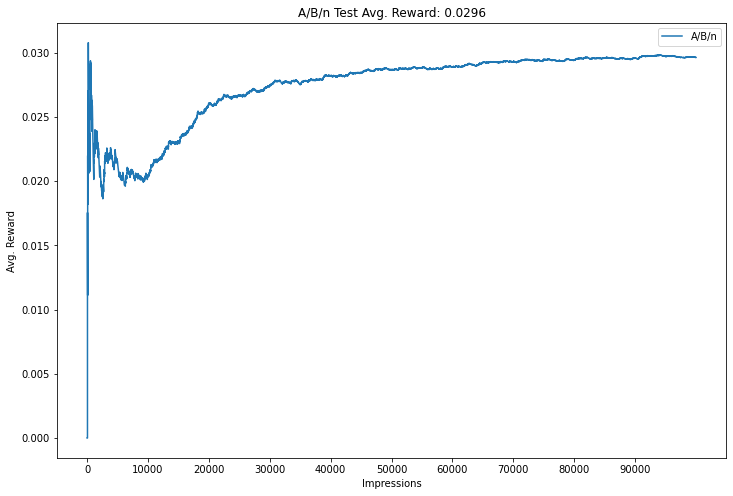

In [42]:
df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])
df_reward_comparison.plot(figsize=(12, 8))

plt.title(f"A/B/n Test Avg. Reward: {avg_rewards[-1]:.4f}")
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xticks(np.arange(0, len(avg_rewards), 10000))

plt.show()

# In the section below, we use the epsilon-greedy for solving exploration-exploitation trade-off

In [43]:
eps = 0.1

Q = np.zeros(n_ads)
N = np.zeros(n_ads)

total_reward = 0
avg_rewards = []

### Training and testing at the same time

In [44]:
ad_chosen = np.random.randint(n_ads)

for i in range(100000):
    reward = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (reward - Q[ad_chosen])
    
    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))
    
    if np.random.rand() <= eps:
        ad_chosen = np.random.randint(n_ads)
    else:
        ad_chosen = np.argmax(Q)

### Plotting the results

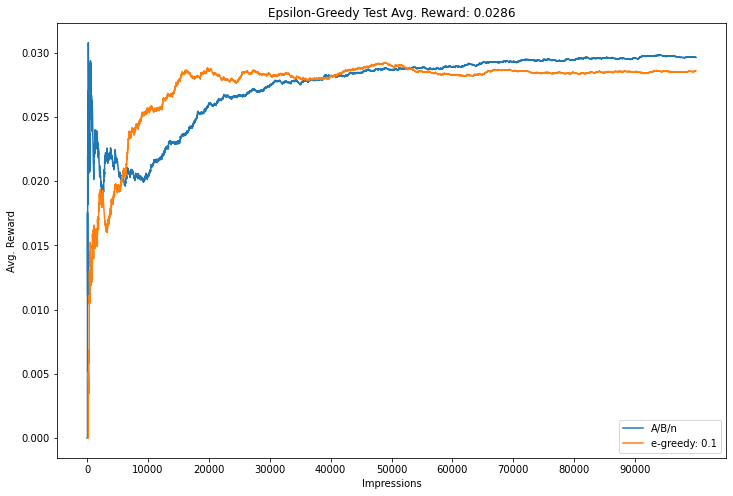

In [45]:
df_reward_comparison[f'e-greedy: {eps}'] = avg_rewards
df_reward_comparison.plot(figsize=(12, 8))

plt.title(f"Epsilon-Greedy Test Avg. Reward: {avg_rewards[-1]:.4f}")
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xticks(np.arange(0, len(avg_rewards), 10000))

plt.show()

# In the section below, we use the upper confidence bounds (UCB) for solving exploration-exploitation trade-off.

In [46]:
c = 0.1
ad_indices = np.arange(n_ads)

Q = np.zeros(n_ads)
N = np.zeros(n_ads)

total_reward = 0
avg_rewards = []

In [47]:
for t in range(1, 100000 + 1):
    if np.any(N == 0):
        ad_chosen = np.random.choice(ad_indices[N==0])
    else:
        uncertainty = np.sqrt(np.log(t) / N)
        ad_chosen = np.argmax(Q + c * uncertainty)

    reward = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen] * (reward - Q[ad_chosen]))

    total_reward += reward
    avg_rewards.append(total_reward / t)

### Plotting the results

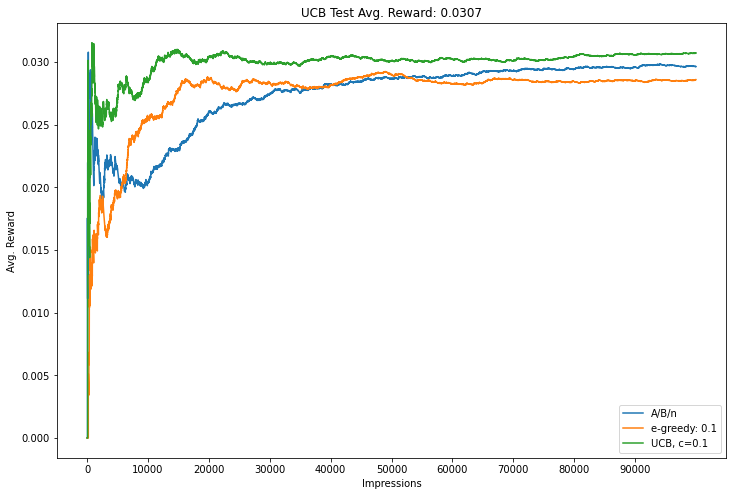

In [48]:
df_reward_comparison[f'UCB, c={c}'] = avg_rewards
df_reward_comparison.plot(figsize=(12, 8))

plt.title(f"UCB Test Avg. Reward: {avg_rewards[-1]:.4f}")
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xticks(np.arange(0, len(avg_rewards), 10000))

plt.show()

# In the section below, we use Thompson Sampling.

In [49]:
alphas = np.ones(n_ads)
betas = np.ones(n_ads)

total_reward = 0
avg_rewards = []

In [50]:
for i in range(100000):
    theta_samples = [np.random.beta(alphas[k], betas[k]) for k in range(n_ads)]

    ad_chosen = np.argmax(theta_samples)
    reward = ads[ad_chosen].display_ad()

    alphas[ad_chosen] += reward
    betas[ad_chosen] += 1 - reward

    total_reward += reward
    avg_rewards.append(total_reward / (i + 1))

### Plotting the results

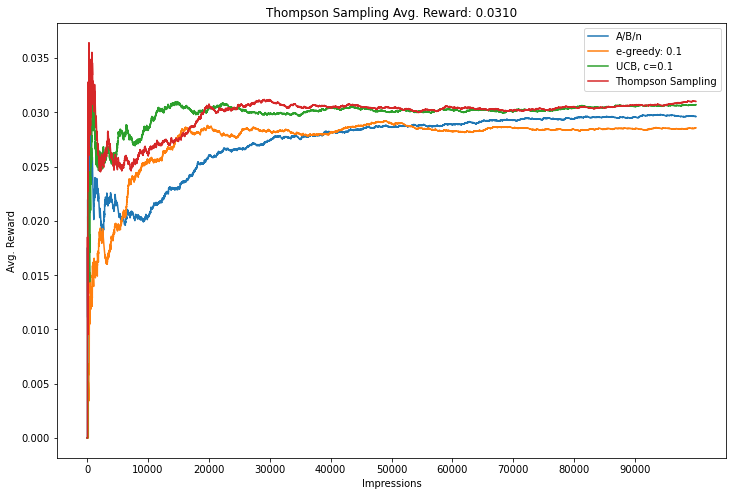

In [51]:
df_reward_comparison['Thompson Sampling'] = avg_rewards
df_reward_comparison.plot(figsize=(12, 8))

plt.title(f"Thompson Sampling Avg. Reward: {avg_rewards[-1]:.4f}")
plt.xlabel("Impressions")
plt.ylabel("Avg. Reward")
plt.xticks(np.arange(0, len(avg_rewards), 10000))

plt.show()